<a href="https://colab.research.google.com/github/mezkymy/airline-cv-analysis/blob/dev/airline_cust_value_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
random_state = 22

<b>Teknis Pengerjaan</b>
1. Pekerjaan dilakukan secara berkelompok, dengan output berupa:

    * File .ipynb yang berisi hasil analisis/modeling
    * Sebuah presentasi .pdf yang berisi ringkasan dari poin-poin penting yang dijabarkan pada slide-slide selanjutnya

2. Homework ini berupa soal clustering end-to-end pertanyaan bisnis dimana teman-teman akan diberikan sebuah dataset mentah berisi data customer. Teman-teman diharapkan melakukan 4 hal berikut dengan menggunakan dataset tersebut
    * EDA
    * Feature Engineering
    * Modeling + Evaluasi
    * Interpretasi model + Rekomendasi

3. Upload hasil pengerjaanmu melalui LMS dengan format nama file sebagai berikut
Nama_Lengkap_Batch_XX dalam format .html (cara save dalam format .html disini)

# Dataset
<b>Airline Customer Value Analysis Case</b>

Deskripsi:
Dataset ini berisi data customer sebuah perusahaan penerbangan dan
beberapa fitur yang dapat menggambarkan value dari customer
tersebut.

Data:
Setiap baris mewakili customer, setiap kolom berisi atribut customer.

[Link data](https://drive.google.com/drive/folders/1v7BjYPybGlhQ9oNiPwgA-1l1uh3Vi3yW)

In [14]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/mezkymy/airline-cv-analysis/main/flight.csv', parse_dates=['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE'])
df = raw_data.copy()
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [16]:
# standardize column header to all lowercase to ease readability and processing
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62988 non-null  int64         
 1   ffp_date           62988 non-null  datetime64[ns]
 2   first_flight_date  62988 non-null  datetime64[ns]
 3   gender             62985 non-null  object        
 4   ffp_tier           62988 non-null  int64         
 5   work_city          60719 non-null  object        
 6   work_province      59740 non-null  object        
 7   work_country       62962 non-null  object        
 8   age                62568 non-null  float64       
 9   load_time          62988 non-null  datetime64[ns]
 10  flight_count       62988 non-null  int64         
 11  bp_sum             62988 non-null  int64         
 12  sum_yr_1           62437 non-null  float64       
 13  sum_yr_2           62850 non-null  float64       
 14  seg_km

<b>Deskripsi Kolom</b> (dalam kapitalisasi original, sebelum diubah menjadi lower case)


* MEMBER_NO: ID Member
* FFP_DATE: Frequent Flyer Program Join Date
* FIRST_FLIGHT_DATE: Tanggal Penerbangan pertama
* GENDER: Jenis Kelamin
* FFP_TIER: Tier dari Frequent Flyer Program
* WORK_CITY: Kota Asal
* WORK_PROVINCE: Provinsi Asal
* WORK_COUNTRY: Negara Asal
* AGE: Umur Customer
* LOAD_TIME: Tanggal data diambil
* FLIGHT_COUNT: Jumlah penerbangan Customer
* BP_SUM: Rencana Perjalanan
* SUM_YR_1: Fare Revenue
* SUM_YR_2: Votes Prices
* SEG_KM_SUM: Total jarak(km) penerbangan yg sudah dilakukan
* LAST_FLIGHT_DATE: Tanggal penerbangan terakhir
* LAST_TO_END: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
* AVG_INTERVAL: Rata-rata jarak waktu
* MAX_INTERVAL: Maksimal jarak waktu
* EXCHANGE_COUNT: Jumlah penukaran
* avg_discount: Rata rata discount yang didapat customer
* Points_Sum: Jumlah poin yang didapat customer
* Point_NotFlight: point yang tidak digunakan oleh members

Berdasarkan informasi di atas, dapat disimpulkan bahwa terdapat beberapa kolom yang memiliki data kosong, sehingga saat preprocessing perlu dilakukan handling untuk baris-baris yang memiliki data kosong tersebut.

Pada pembacaan data menggunakan `pd.read_csv`, beberapa kolom yang berbentuk tanggal langsung dibaca menjadi tipe data `datetime` menggunakan `parse_dates`, namun ada satu kolom yang tidak terbaca menjadi `datetime` yaitu kolom `last_flight_date`. Hal ini diduga diakibatkan oleh adanya beberapa data pada `last_flight_date` yang tidak berbentuk tanggal, sehingga perlu ditangani.



In [ ]:
# convert last_flight_date to datetime
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'], format='%m/%d/%y', errors='ignore')
df.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
# check data type after conversion
print(df['last_flight_date'].dtypes)

object


Setelah melakukan konversi tipe data kolom `last_flight_date` menjadi `datetime`, masih ditemukan beberapa data yang tidak bisa dikonversi langsung. Data tersebut mungkin perlu dilihat dan ditangani secara manual.

In [ ]:
# check unconverted data
df_err = df[pd.to_datetime(df['last_flight_date'], errors='coerce').isna()]
df_err['last_flight_date'].unique()

array(['2014/2/29  0:00:00'], dtype=object)

Berdasarkan info di atas, dapat dilihat bahwa terdapat satu tanggal yang bermasalah yaitu tanggal 2014/2/29. Tanggal tersebut tidak valid karena pada tahun 2014, Bulan Februari hanya memiliki 28 hari. Untuk saat ini, data akan diubah menjadi 2014/2/28.

In [ ]:
# convert 29 Feb 2019 to 28 Feb 2014
df.loc[df['last_flight_date'] == '2014/2/29  0:00:00', 'last_flight_date'] = np.datetime64('2014-02-28')
df['last_flight_date'] = pd.to_datetime(df['last_flight_date'])

# recheck data type after conversion
print(df['last_flight_date'].dtypes)

datetime64[ns]


Setelah diperiksa ulang, saat ini kolom `last_flight_date` sudah berbentuk `datetime64`.

Jika setiap baris pada kolom `member_no` merupakan nilai unik, maka kolom tersebut tidak perlu digunakan dalam studi kasus ini dan dapat di drop. 

In [ ]:
# check if member_no is all unique, if True then drop column
if df['member_no'].is_unique:
    df.drop('member_no', axis=1, inplace=True)

df.head()

,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


# Exploratory Data Analysis
Petunjuk:
* Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat

* Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal)

* Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain

In [ ]:
df.isna().sum()

ffp_date                0
first_flight_date       0
gender                  3
ffp_tier                0
work_city            2269
work_province        3248
work_country           26
age                   420
load_time               0
flight_count            0
bp_sum                  0
sum_yr_1              551
sum_yr_2              138
seg_km_sum              0
last_flight_date        0
last_to_end             0
avg_interval            0
max_interval            0
exchange_count          0
avg_discount            0
points_sum              0
point_notflight         0
dtype: int64

In [ ]:
df_missingvalue = df.copy()
# Counting the total number of rows with missing values
total_missing_rows = len(df_missingvalue) - len(df_missingvalue.dropna())

# Printing the total number of rows with missing values
print("Total number of rows with missing values: ", total_missing_rows)

Total number of rows with missing values:  4733


In [ ]:
# Calculating the total number of rows
total_rows = len(df_missingvalue)

# Calculating the percentage of rows with missing values
percentage_missing = (total_missing_rows / total_rows) * 100

# Printing the percentage of rows with missing values
print("Percentage of rows with missing values: ", round(percentage_missing, 2), "%")

Percentage of rows with missing values:  7.51 %


In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 1


In [ ]:
# Print duplicated rows
duplicated_df = df[df.duplicated(keep=False)]
print(duplicated_df)

        ffp_date first_flight_date gender  ffp_tier work_city work_province  \
49070 2012-08-11        2012-08-11   Male         4    panjin      liaoning   
49085 2012-08-11        2012-08-11   Male         4    panjin      liaoning   

      work_country   age  load_time  flight_count  ...  sum_yr_2  seg_km_sum  \
49070           CN  40.0 2014-03-31             2  ...       0.0        4844   
49085           CN  40.0 2014-03-31             2  ...       0.0        4844   

       last_flight_date  last_to_end avg_interval  max_interval  \
49070        2012-08-18          592          7.0             7   
49085        2012-08-18          592          7.0             7   

       exchange_count  avg_discount  points_sum  point_notflight  
49070               0      0.600021        1841                0  
49085               0      0.600021        1841                0  

[2 rows x 22 columns]


In [ ]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
# Check again for duplicated rows
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


In [ ]:
# memeriksa outlier dari tiap kolom numerik menggunakan z-score test
from scipy import stats

numericals = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum',
              'point_notflight']

zscore = pd.DataFrame()
outlier = pd.DataFrame()
filtered_zscore = np.array([True] * len(df))

for col in numericals:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    outlier[col] = df[col][zscore>3]
    filtered_zscore = (zscore < 3) & filtered_zscore 

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 62255
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ffp_tier         1513 non-null   int64  
 1   age              0 non-null      float64
 2   flight_count     555 non-null    float64
 3   bp_sum           551 non-null    float64
 4   sum_yr_1         0 non-null      float64
 5   sum_yr_2         0 non-null      float64
 6   seg_km_sum       476 non-null    float64
 7   last_to_end      0 non-null      float64
 8   avg_interval     8 non-null      float64
 9   max_interval     8 non-null      float64
 10  exchange_count   336 non-null    float64
 11  avg_discount     314 non-null    float64
 12  points_sum       541 non-null    float64
 13  point_notflight  164 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 177.3 KB


In [ ]:
#drop outlier
print(f'jumlah baris data SEBELUM filter outlier: {len(df)}')

# get index of outliers
outlier_id = outlier.index
df_outlier_removed = df.drop(outlier_id)

print(f'jumlah baris data SETELAH filter outlier: {len(df_outlier_removed)}')

jumlah baris data SEBELUM filter outlier: 62987
jumlah baris data SETELAH filter outlier: 61474


In [ ]:
# columns
categoricals = ['gender', 'work_city', 'work_province', 'work_country']
numericals = ['ffp_tier', 'age', 'flight_count', 'bp_sum', 'sum_yr_1', 'sum_yr_2', 'seg_km_sum', 'last_to_end', 'avg_interval', 'max_interval', 'exchange_count', 'avg_discount', 'points_sum',
              'point_notflight']
timestamp = ['ffp_date', 'first_flight_date', 'load_time', 'last_flight_date']

In [ ]:
# categoricals columns describe
df[categoricals].describe()

,gender,work_city,work_province,work_country
count,62984,60718,59739,62961
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48133,9386,17509,57747


In [ ]:
# numericals columns describe (including datetime)
df.describe(datetime_is_numeric=True)

,ffp_date,first_flight_date,ffp_tier,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
count,62987,62987,62987.000000,62567.000000,62987,62987.000000,62987.000000,62436.000000,62849.000000,62987.000000,62987,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000,62987.000000
mean,2010-03-06 23:38:30.591074560,2010-09-01 17:43:32.024703488,4.102164,42.476385,2014-03-31 00:00:00,11.839570,10925.225475,5355.423382,5604.115181,17124.073650,2013-10-07 14:50:54.230237696,176.113500,67.750752,166.036420,0.319780,0.721560,12545.947053,2.728198
min,2004-11-01 00:00:00,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008-04-12 00:00:00,2008-12-14 12:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2518.000000,1003.000000,780.000000,4747.000000,2013-07-08 12:00:00,29.000000,23.370370,79.000000,0.000000,0.612002,2775.000000,0.000000
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,2013-12-15 00:00:00,108.000000,44.666667,143.000000,0.000000,0.711857,6329.000000,0.000000
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,15.000000,12831.000000,6574.250000,6846.000000,21271.500000,2014-03-03 00:00:00,267.500000,82.000000,228.000000,0.000000,0.809480,14303.000000,1.000000
max,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,110.000000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000
std,NaN,NaN,0.373859,9.885989,NaN,14.049528,16339.575767,8109.506470,8703.404781,20960.953906,NaN,183.816213,77.518103,123.396532,1.136013,0.185427,20507.935139,7.364214


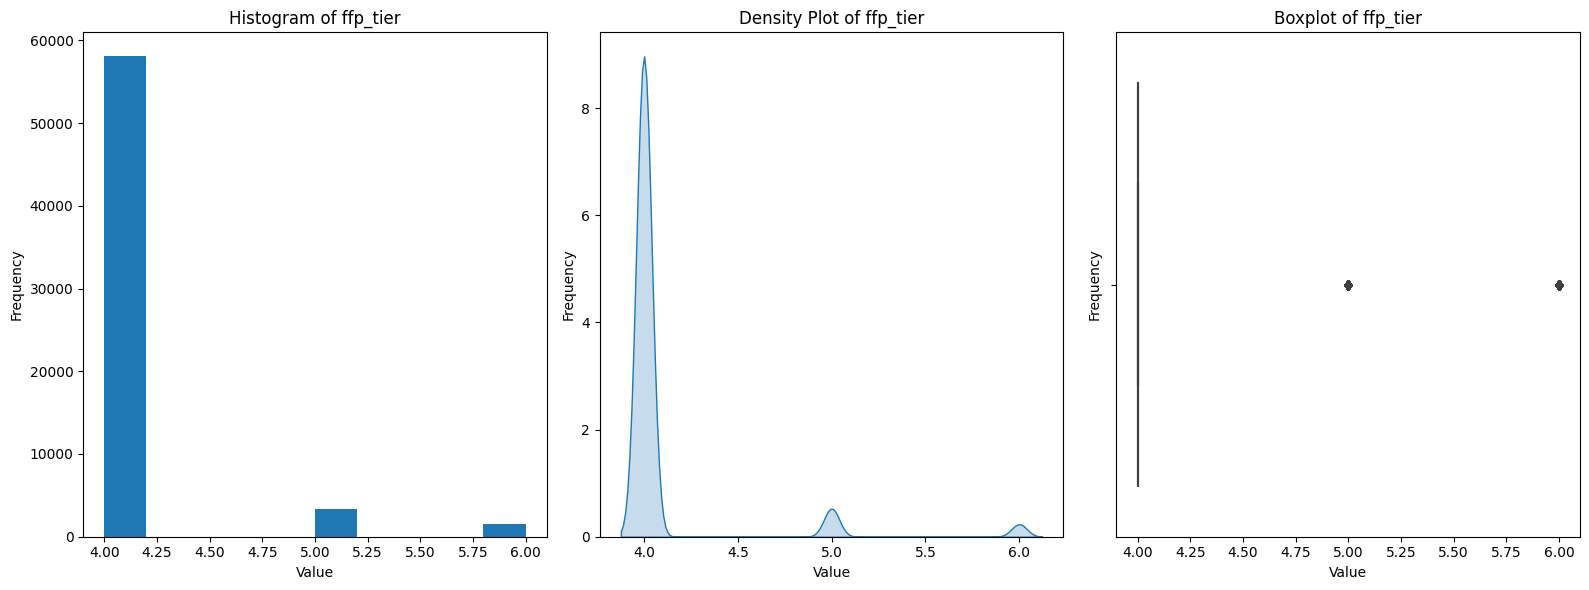

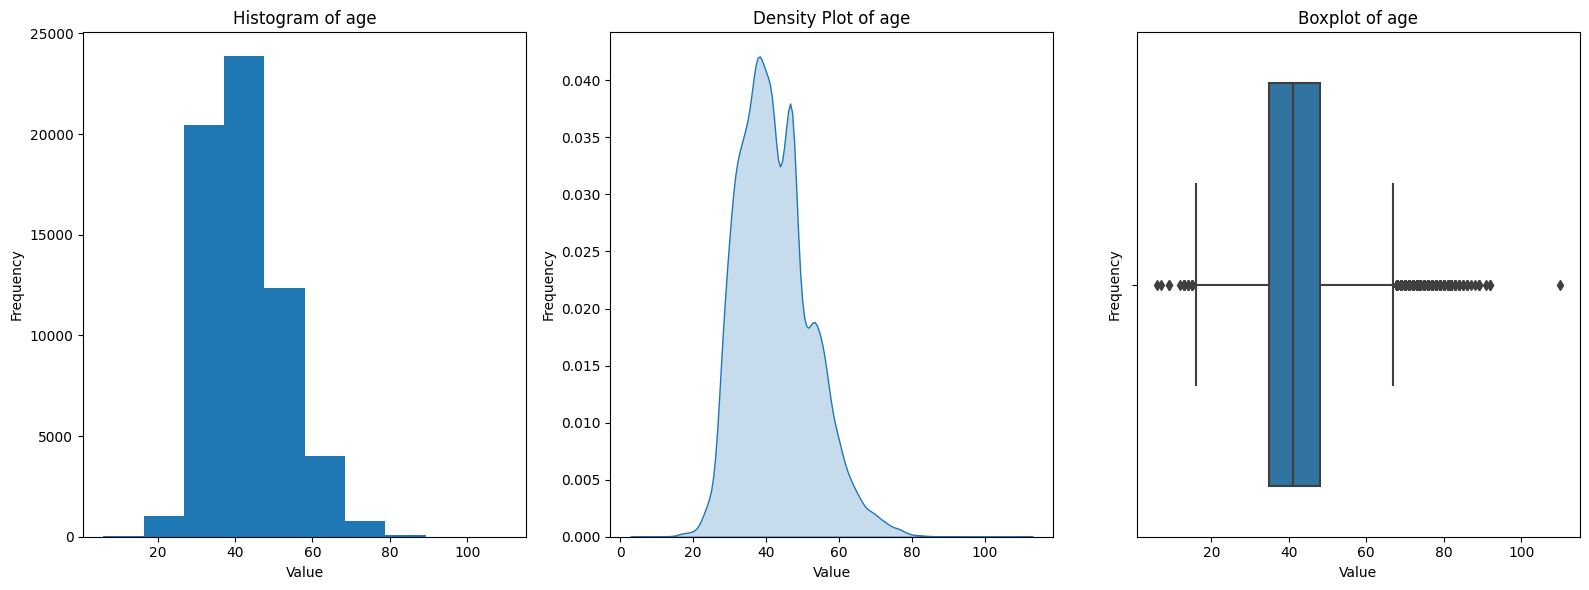

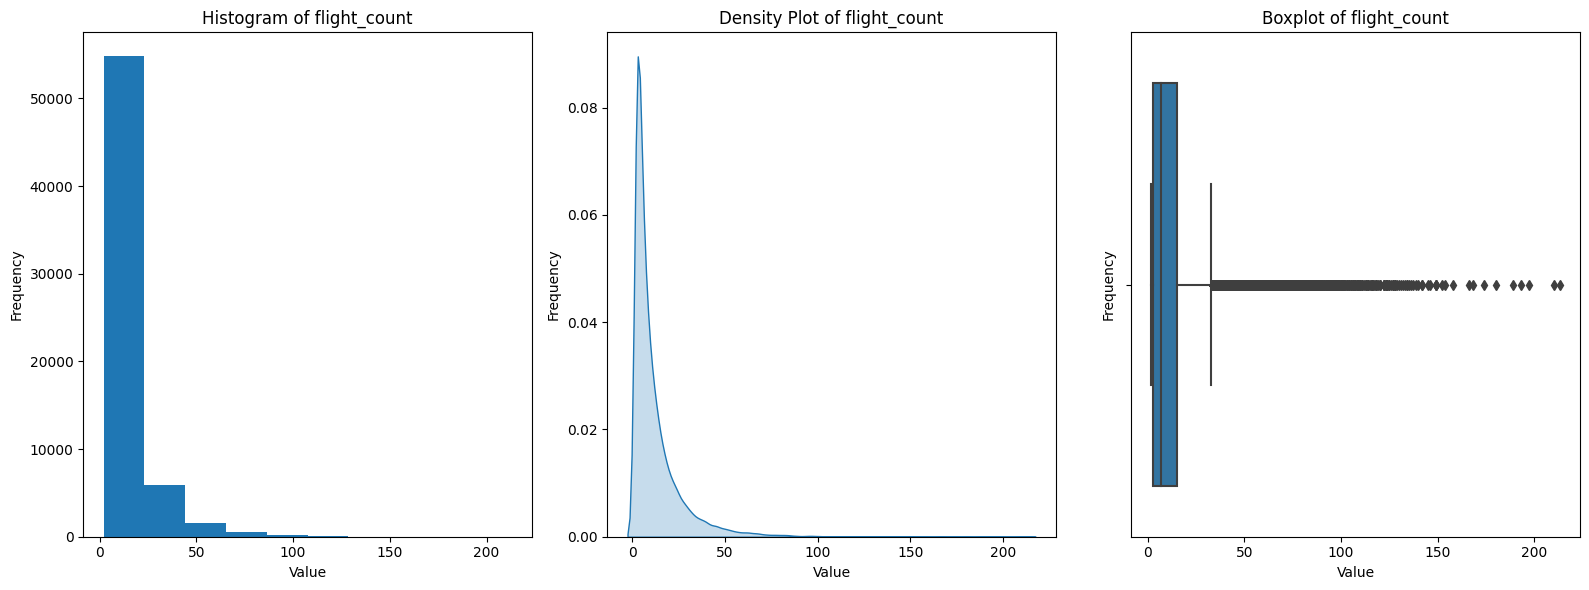

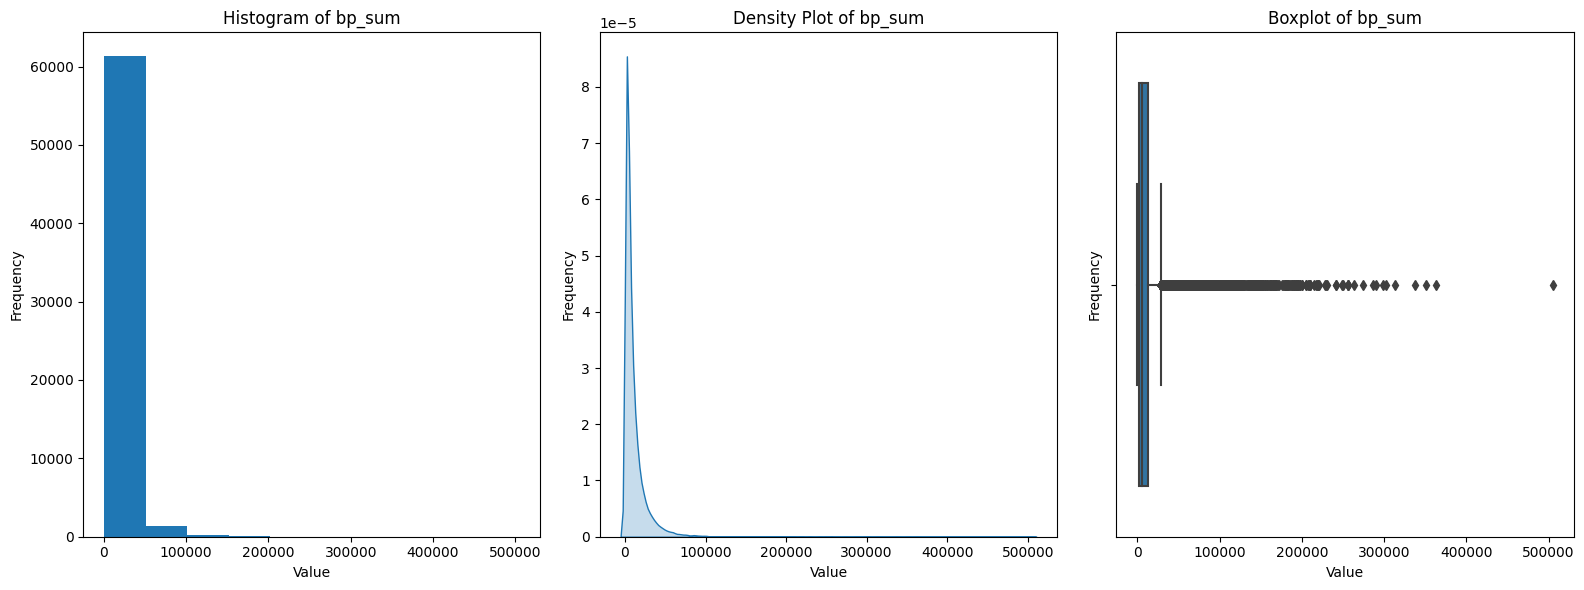

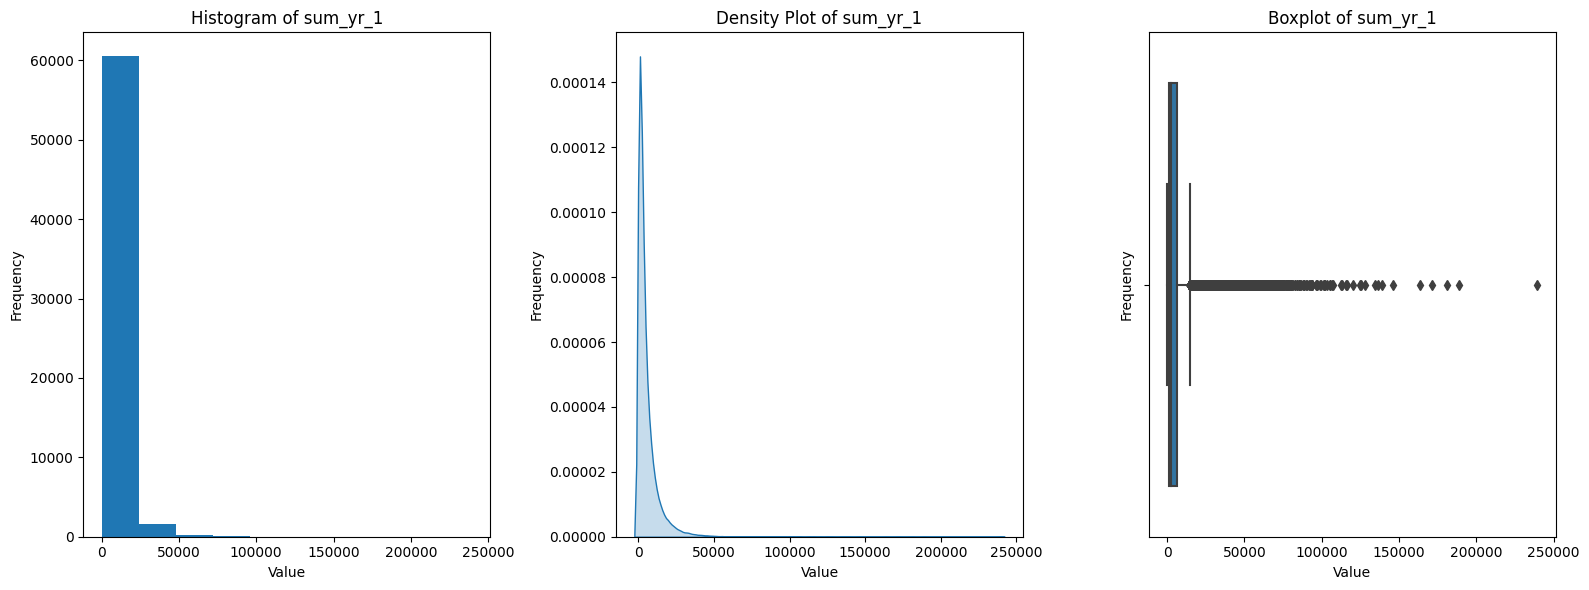

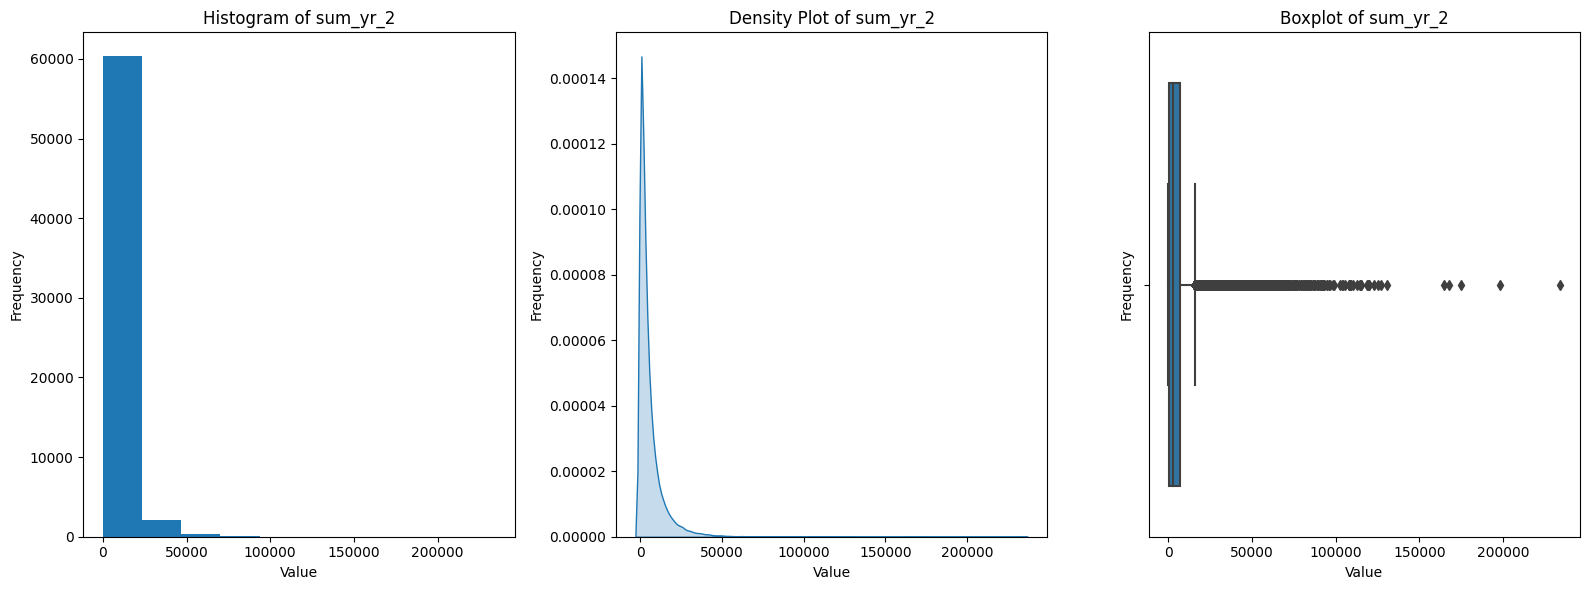

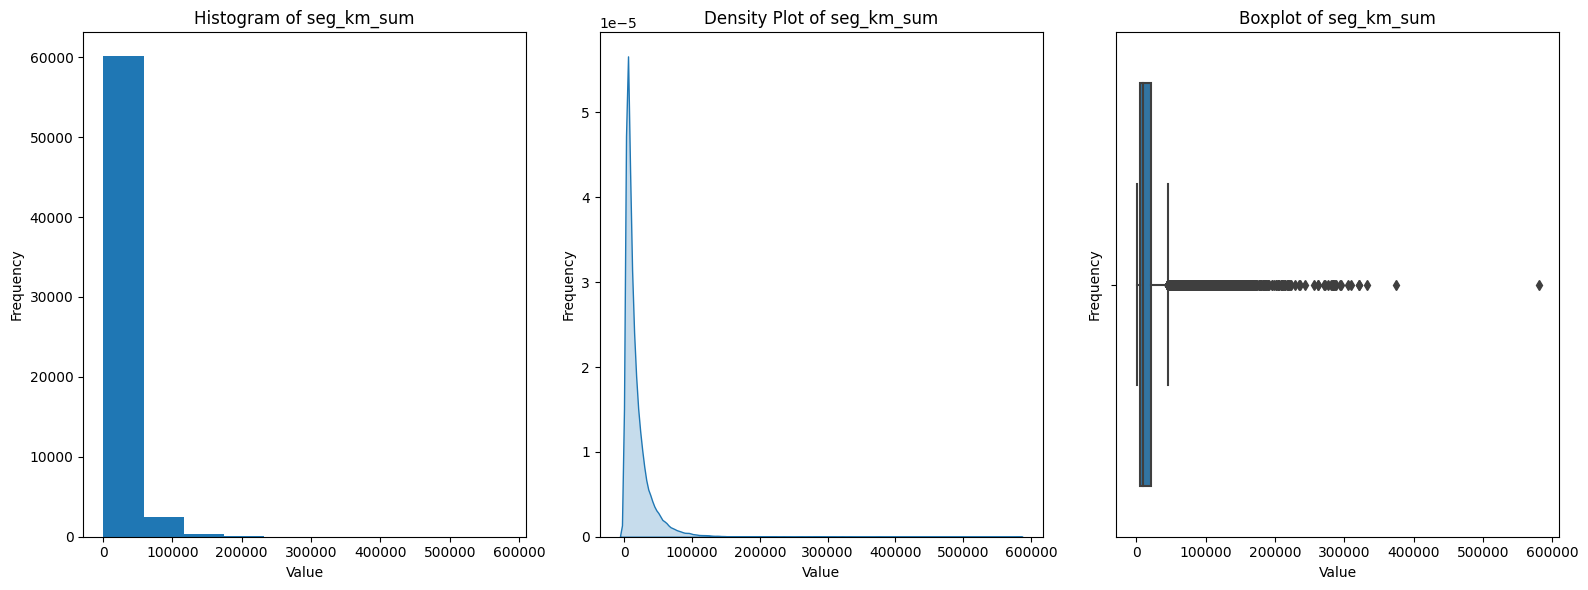

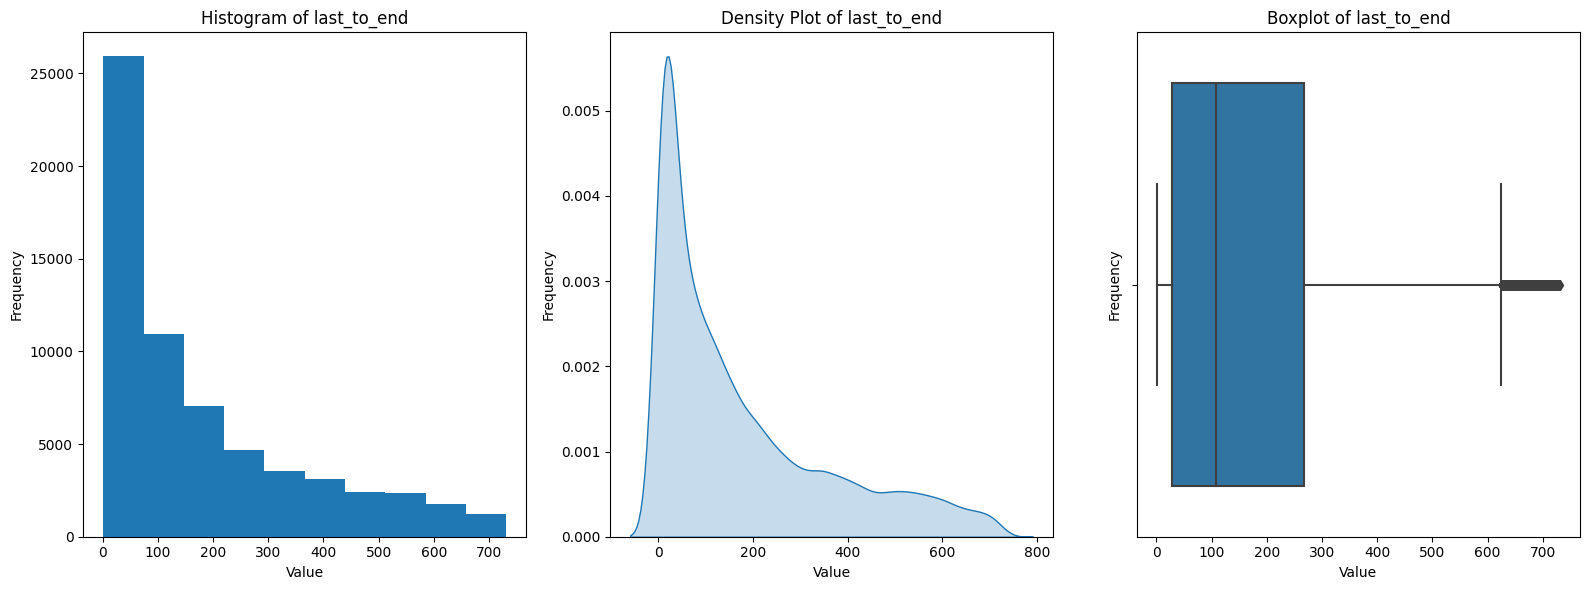

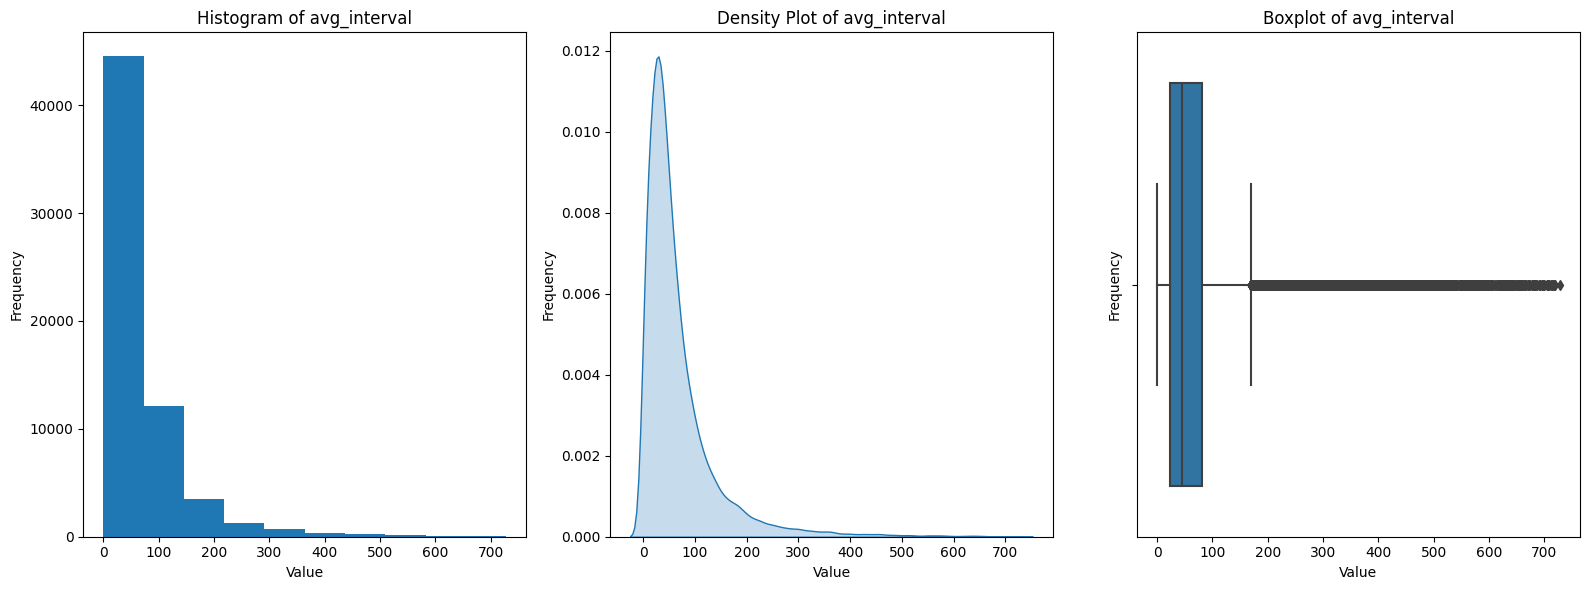

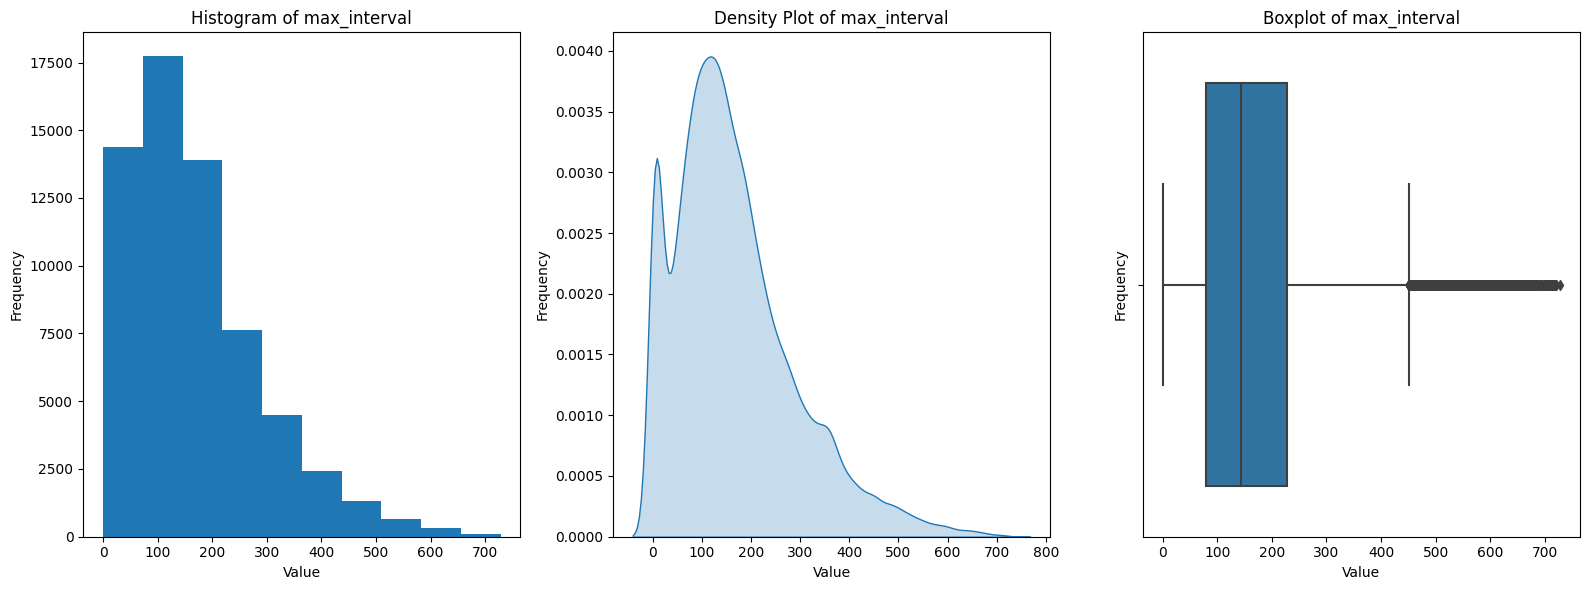

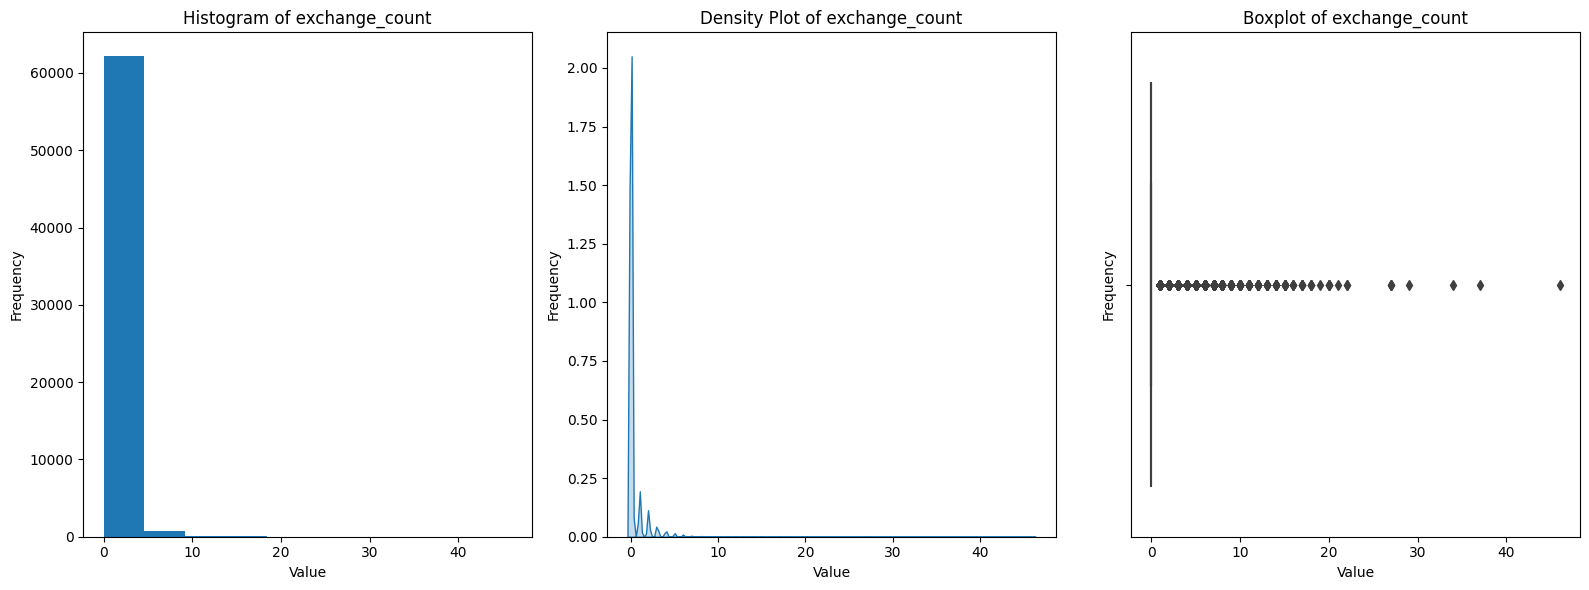

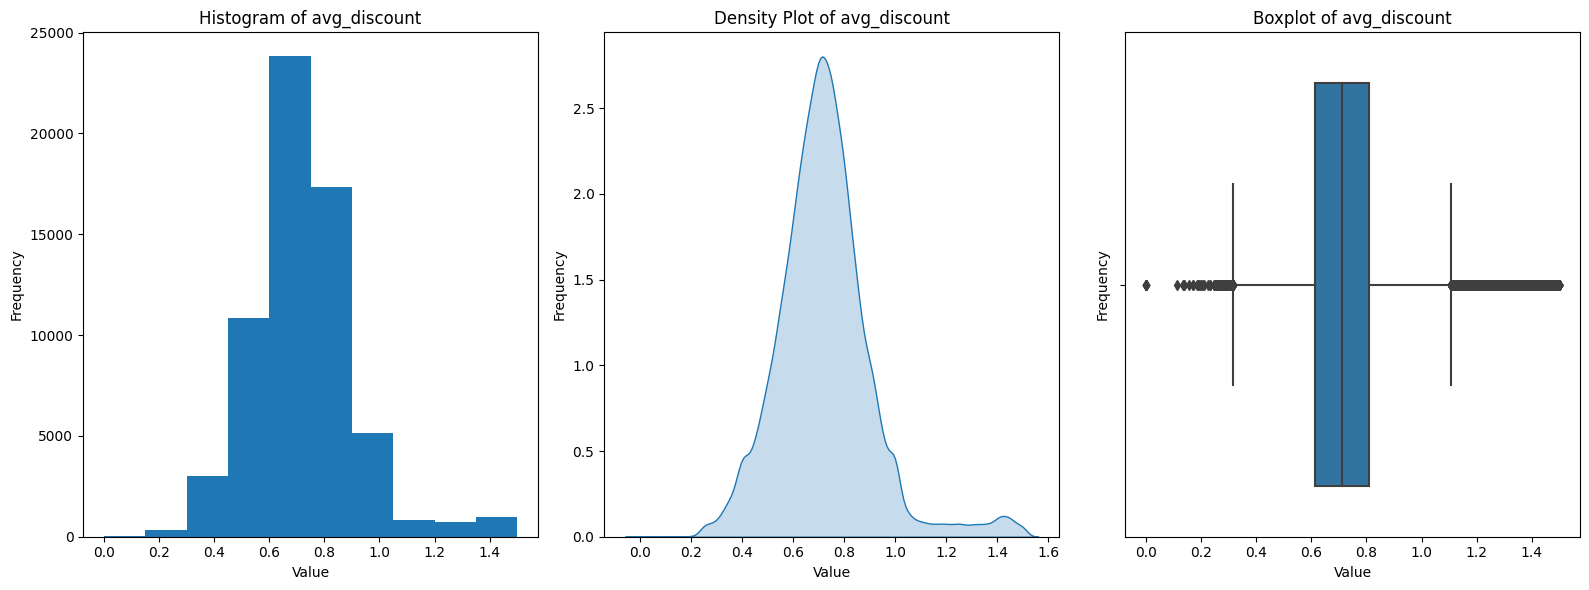

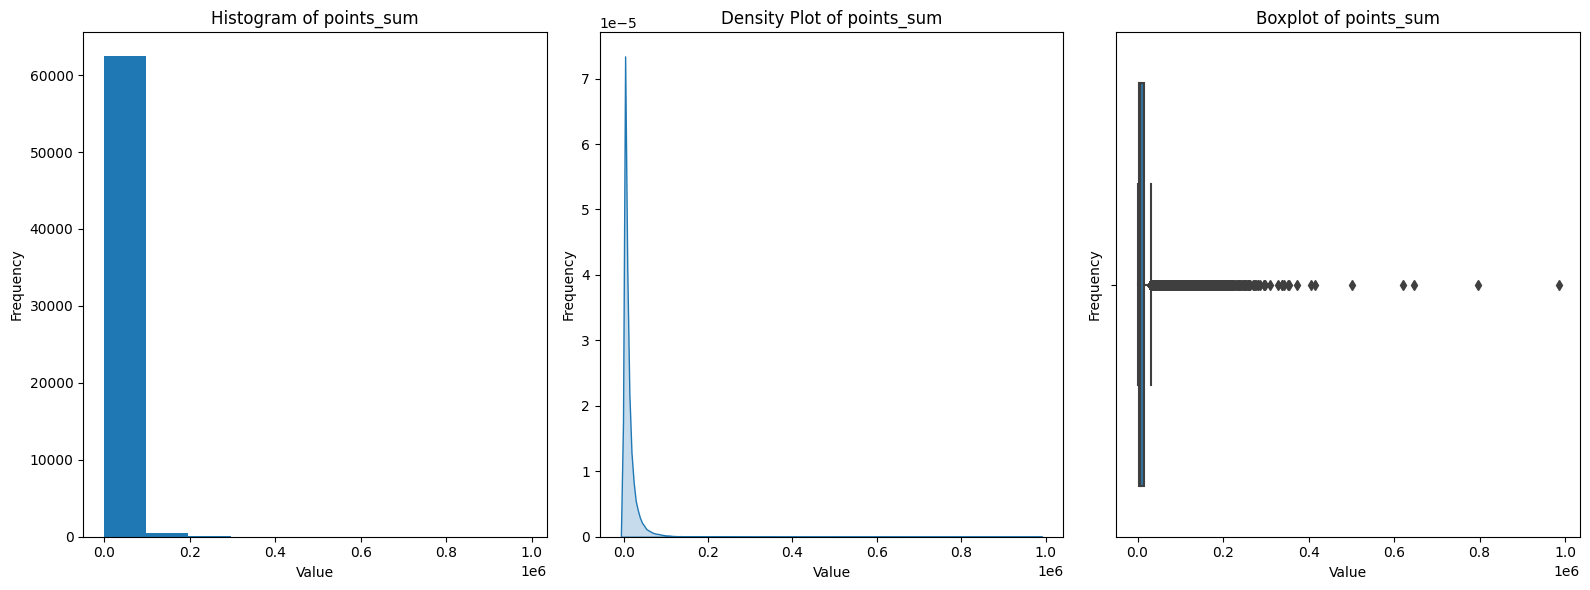

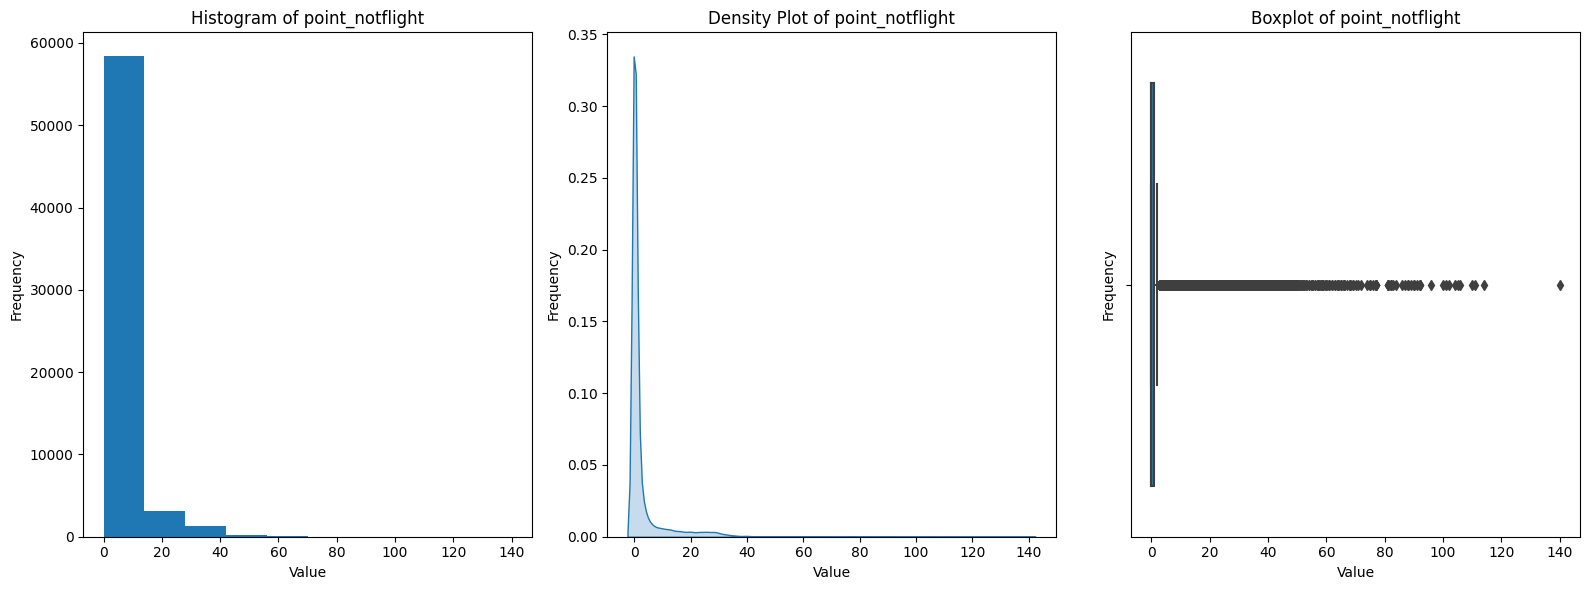

In [ ]:
num = df[numericals]

# create figure with 3 subplots
for col in num:
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    
    # Histogram
    ax[0].hist(num[col], bins=10)
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Frequency')
    ax[0].set_title('Histogram of {}'.format(col))
    
    # Density Plot
    sns.kdeplot(num[col], ax=ax[1], fill=True)
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Frequency')
    ax[1].set_title('Density Plot of {}'.format(col))
    
    # Boxplot
    sns.boxplot(x=num[col], ax=ax[2])
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Frequency')
    ax[2].set_title('Boxplot of {}'.format(col))
    
    # Show Plots
    plt.tight_layout()
    plt.show

Catatan: first flight date ada yang di tahun 1905??

In [ ]:
## ONLY UNCOMMENT ON THE FINAL VERSION OR WHEN NECESSARY, CELL TAKES A LONG TIME TO RUN

# sns.pairplot(df)
# plt.show()

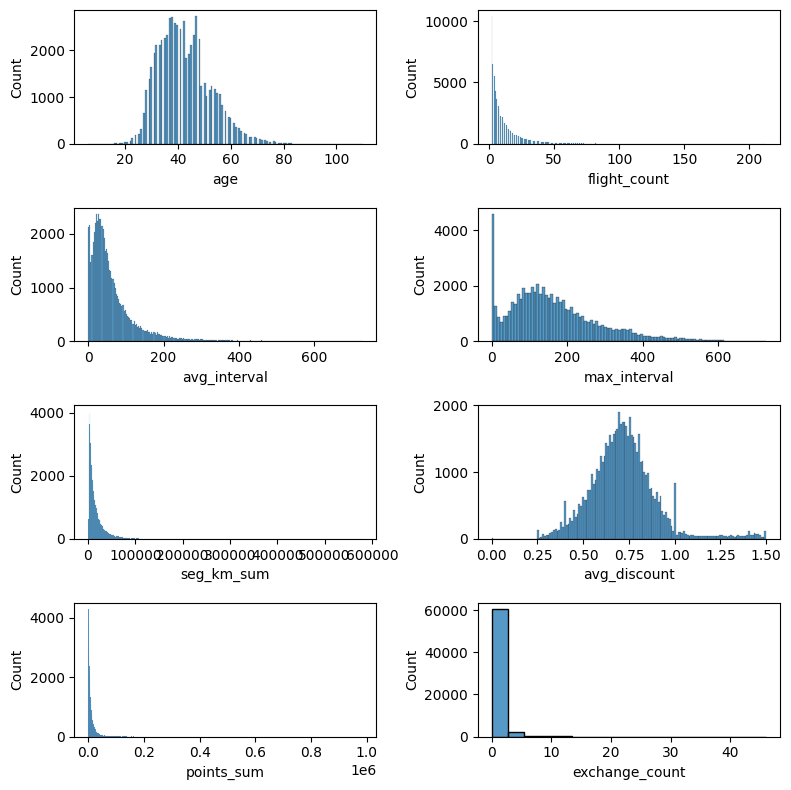

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(8,8))
sns.histplot(data=df, x='age', ax=axs[0][0])
sns.histplot(data=df, x='flight_count', ax=axs[0][1])
sns.histplot(data=df, x='avg_interval', ax=axs[1][0])
sns.histplot(data=df, x='max_interval', ax=axs[1][1])
sns.histplot(data=df, x='seg_km_sum', ax=axs[2][0])
sns.histplot(data=df, x='avg_discount', ax=axs[2][1])
sns.histplot(data=df, x='points_sum', ax=axs[3][0])
sns.histplot(data=df, x='exchange_count', ax=axs[3][1])

fig.tight_layout()
plt.show()

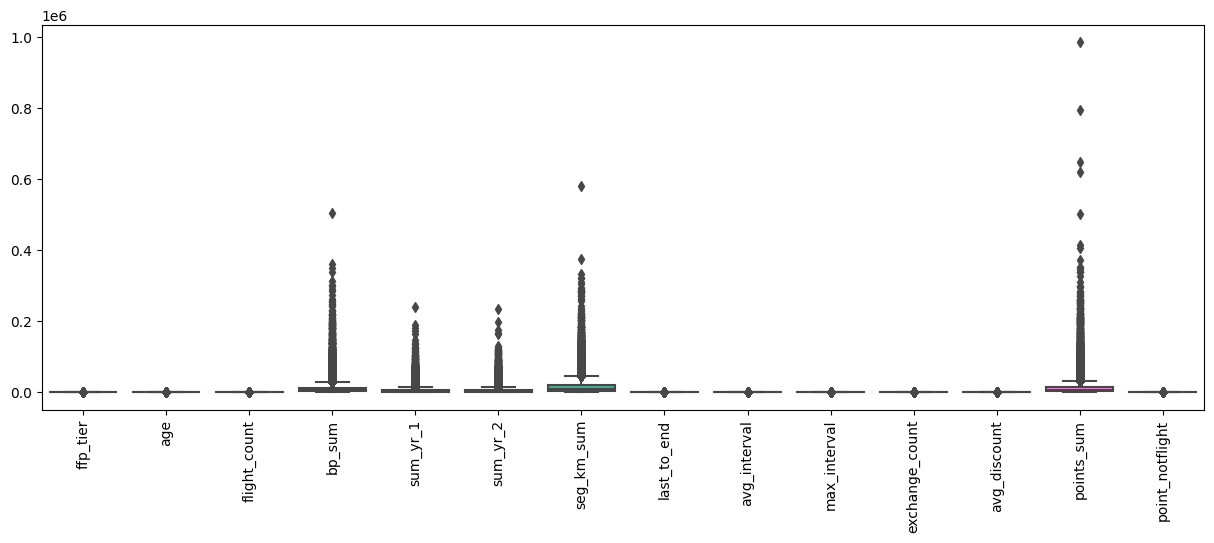

In [ ]:
# Check for outliers using box plots
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<ipython-input-26-f53c9b5f0143>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


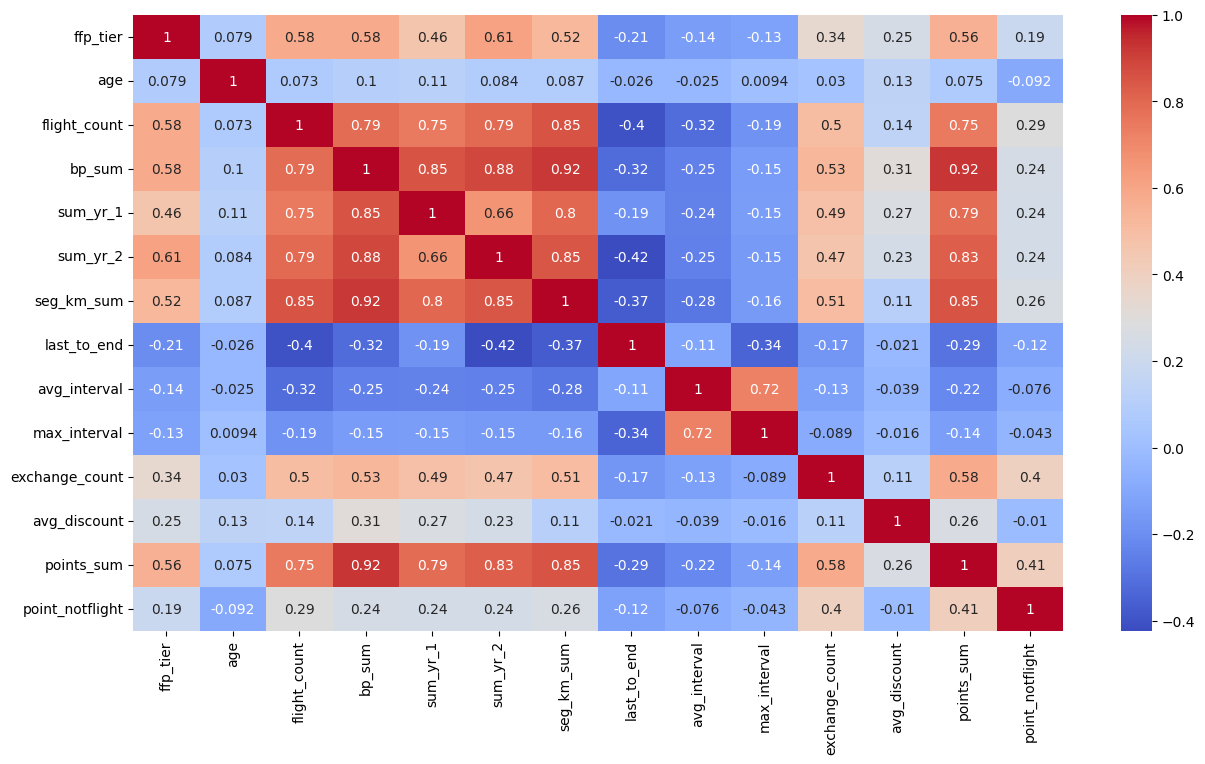

In [ ]:
# Check the correlation between variables using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

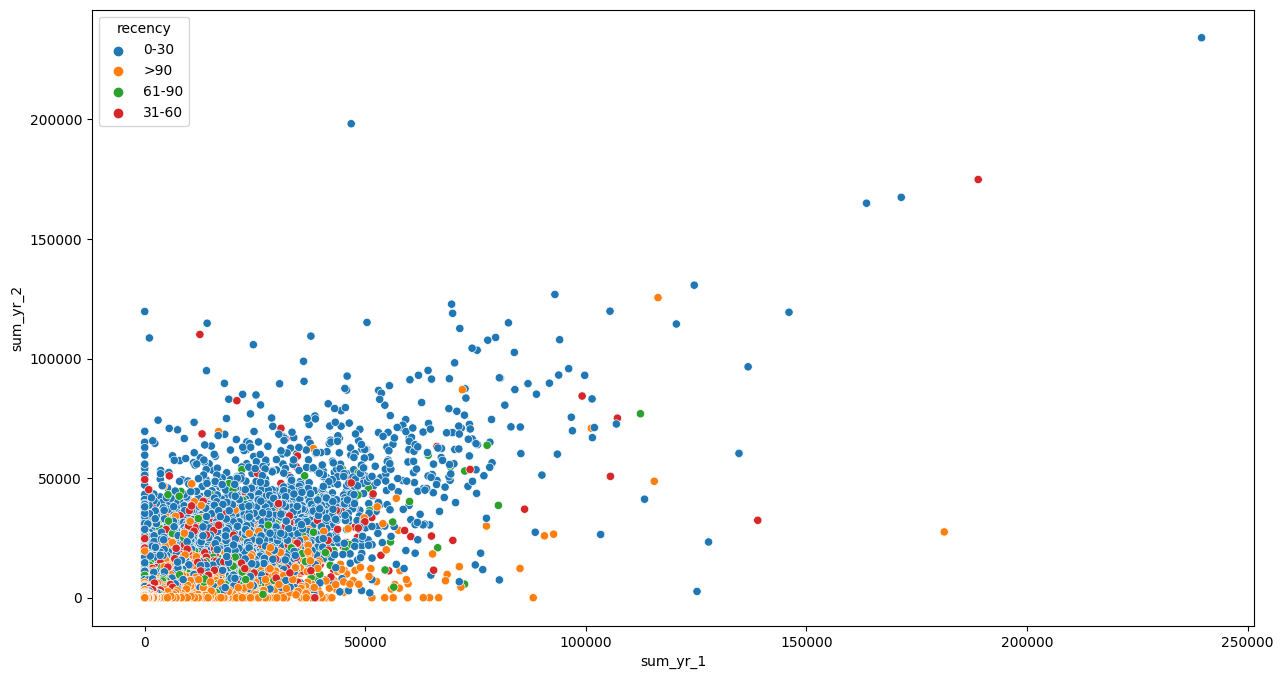

In [ ]:
# Visualize the relationship between variables using scatter plots
df['recency'] = df['last_to_end'].apply(lambda x: '0-30' if x<=30 else ('31-60' if x<=60 else ('61-90' if x<=90 else '>90')))

plt.figure(figsize=(15,8))
sns.scatterplot(x='sum_yr_1', y='sum_yr_2', data=df, hue='recency')
plt.show()

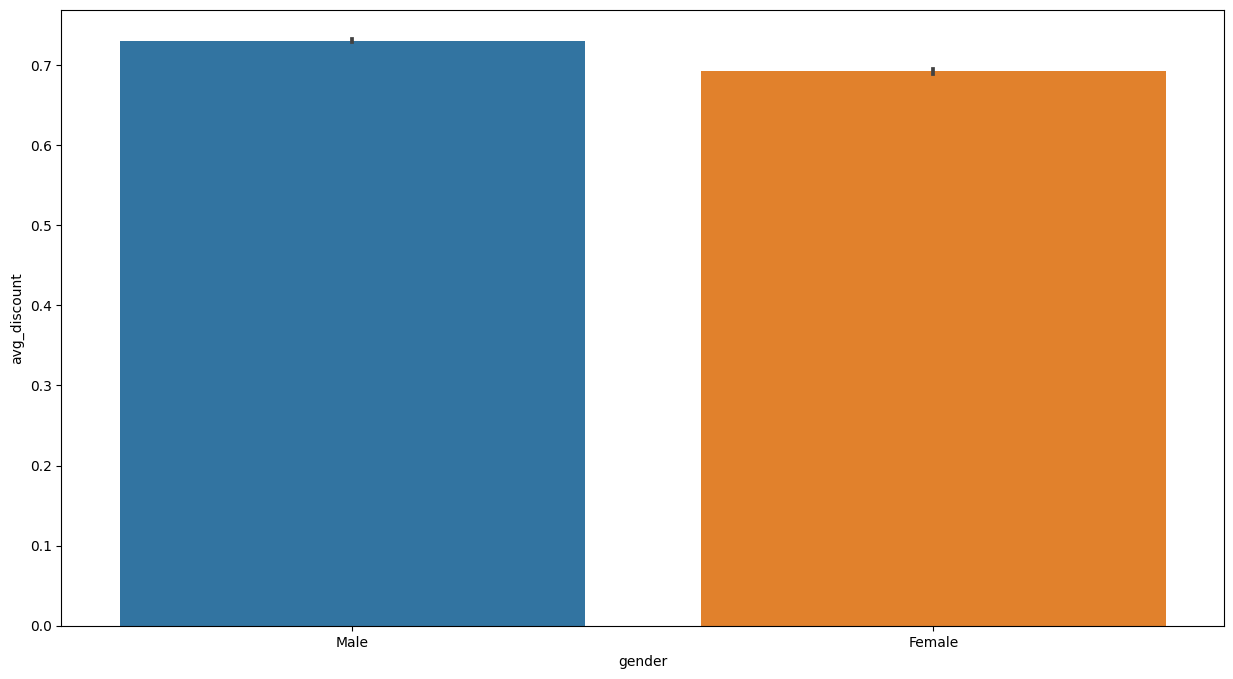

In [ ]:
# Bivariate analysis: Compare the average discount rate by gender
plt.figure(figsize=(15,8))
sns.barplot(x='gender', y='avg_discount', data=df)
plt.show()

<Figure size 1500x800 with 0 Axes>

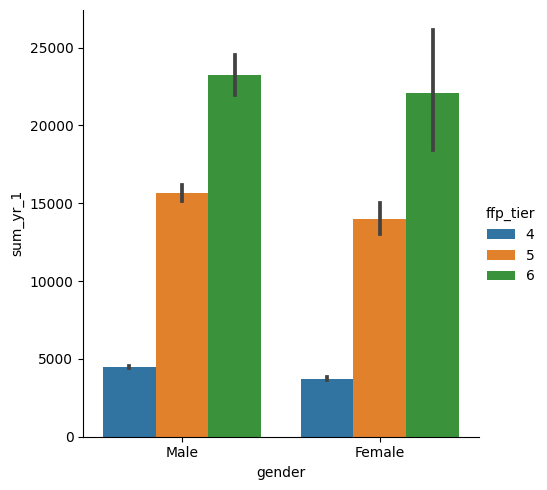

In [ ]:
# Multivariate analysis: Compare the fare revenue by gender and tier
plt.figure(figsize=(15,8))
sns.catplot(x='gender', y='sum_yr_1', hue='ffp_tier', kind='bar', data=df)
plt.show()

In [ ]:
# Bisa di Costumize lg 
# convert the Purchase Date to datetime
testing = df.copy()
testing['ffp_date'] = pd.to_datetime(testing['ffp_date'])
testing['first_flight_date'] = pd.to_datetime(testing['first_flight_date'])
# add a column for Year
testing['year_ffp'] = testing['ffp_date'].dt.year
testing['year_first_flight'] = testing['first_flight_date'].dt.year
# print the dataframe
testing.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,year_ffp,year_first_flight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,3/31/2014,1,3.483254,18,34,0.961639,619760,50,2006,2008
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,3/25/2014,7,5.194245,17,29,1.252314,415768,33,2007,2007
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,3/21/2014,11,5.298507,18,20,1.254676,406361,26,2007,2007
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,12/26/2013,97,27.863636,73,11,1.090870,372204,12,2008,2008
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,3/27/2014,5,4.788079,47,27,0.970658,338813,39,2009,2009


In [17]:
# Bisa di Costumize lg 
# convert the Purchase Date to datetime
testing = df.copy()
testing['ffp_date'] = pd.to_datetime(testing['ffp_date'])
testing['first_flight_date'] = pd.to_datetime(testing['first_flight_date'])
# add a column for Year
testing['year_ffp'] = testing['ffp_date'].dt.year
testing['year_first_flight'] = testing['first_flight_date'].dt.year
# print the dataframe
testing.head()

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight,year_ffp,year_first_flight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,3/31/2014,1,3.483254,18,34,0.961639,619760,50,2006,2008
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,3/25/2014,7,5.194245,17,29,1.252314,415768,33,2007,2007
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,3/21/2014,11,5.298507,18,20,1.254676,406361,26,2007,2007
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,12/26/2013,97,27.863636,73,11,1.090870,372204,12,2008,2008
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,3/27/2014,5,4.788079,47,27,0.970658,338813,39,2009,2009


# Feature Engineering
Petunjuk:
* Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

* Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman
pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

In [ ]:
#New DataFrame containing relevant column (column not fixed yet)
clustering_df = df[['avg_discount', 'points_sum', 'seg_km_sum', 'flight_count']]

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scale using StandardScaler
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(clustering_df)

In [ ]:
#Convert scaled data to DataFrame
clustering_df_scaled = pd.DataFrame(clustering_df_scaled, columns=clustering_df.columns)

In [ ]:
#Show scaled data statistics
clustering_df_scaled.describe()

,avg_discount,points_sum,seg_km_sum,flight_count
count,6.298700e+04,6.298700e+04,6.298700e+04,6.298700e+04
mean,1.660531e-16,7.219702e-17,-5.053791e-17,-2.887881e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.891362e+00,-6.117655e-01,-7.994010e-01,-7.003544e-01
25%,-5.908457e-01,-4.764509e-01,-5.904871e-01,-6.291770e-01
50%,-5.232841e-02,-3.031508e-01,-3.401625e-01,-3.444677e-01
75%,4.741515e-01,8.567742e-02,1.978660e-01,2.249510e-01
max,4.198119e+00,4.744670e+01,2.688797e+01,1.431806e+01


# Clustering
Petunjuk:
* Temukan jumlah cluster yang optimal dengan menggunakan elbow method

* Lakukan clustering menggunakan K-means

* Evaluasi cluster yang dihasilkan dengan menggunakan visualisasi, gunakan PCA
apabila diperlukan

# Interpretasi
Petunjuk:
* Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik fitur dari setiap cluster

* Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster

* Berdasarkan cluster tersebut, berikan 1-2 rekomendasi

## Pipeline untuk code dari preprocessing sampai modelling (K-Means)
untuk elbow method dan shilouette score perlu ditambahin

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
num = ['SEG_KM_SUM', 'FLIGHT_COUNT', 'Points_Sum'] # Untuk Coba data

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), num)
    ])
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=3)),
    ('kmeans', KMeans(n_clusters=2, init='k-means++',  n_init=50, random_state=random_state))
])

# Fit and transform the data
pipe.fit(x_train_outlier_removed)
test = pipe.transform(x_train_outlier_removed)

NameError: ignored

In [ ]:
dataframe = pd.DataFrame(test)
dataframe.describe()

In [ ]:
labels = pipe.named_steps['kmeans'].labels_

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=dataframe.iloc[:,0], y=dataframe.iloc[:,1], hue=labels, palette='viridis')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Clustering K-means = 2')
plt.show()